In [1]:
## 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\KDP-14\anaconda3\envs\commate\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## 데이터 셋 DF로 전환
dataDF = pd.read_csv('../기업 프로젝트/Dataset/바웰공정데이터(1차데이터).csv')

FileNotFoundError: [Errno 2] No such file or directory: '../기업 프로젝트/Dataset/바웰공정데이터(1차데이터).csv'

In [67]:
list(dataDF['scale_pv'].value_counts().index.sort_values())

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.1,
 0.11,
 0.12,
 0.13,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.39,
 0.82,
 0.85,
 0.98,
 0.99,
 1.33,
 1.34,
 2.0,
 2.56,
 2.57,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.19,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.29,
 3.34,
 3.35,
 3.37,
 3.41,
 3.43,
 3.49,
 3.59,
 3.84,
 3.85,
 4.0,
 4.03,
 4.04,
 4.07,
 9.17,
 9.18,
 15.1,
 15.3,
 655.04,
 655.19,
 655.2,
 655.21,
 655.22,
 655.23,
 655.24,
 655.25,
 655.26,
 655.27,
 655.28,
 655.29,
 655.3,
 655.31,
 655.32,
 655.33,
 655.34,
 655.35]

In [71]:
dataDF = dataDF[(dataDF['scale_pv'] < 5) & (dataDF['scale_pv'] != 0) & (dataDF['scale_pv'] >= 2.8)]

In [72]:
dataDF['scale_pv']

0         3.01
1         3.01
2         3.08
3         3.08
4         3.08
          ... 
143078    3.01
143081    3.03
143082    3.03
143086    3.06
143090    3.05
Name: scale_pv, Length: 28098, dtype: float64

(array([1.110e+02, 1.866e+04, 9.122e+03, 1.320e+02, 2.300e+01, 2.000e+00,
        5.000e+00, 0.000e+00, 1.300e+01, 3.000e+01]),
 array([2.8  , 2.927, 3.054, 3.181, 3.308, 3.435, 3.562, 3.689, 3.816,
        3.943, 4.07 ]),
 <BarContainer object of 10 artists>)

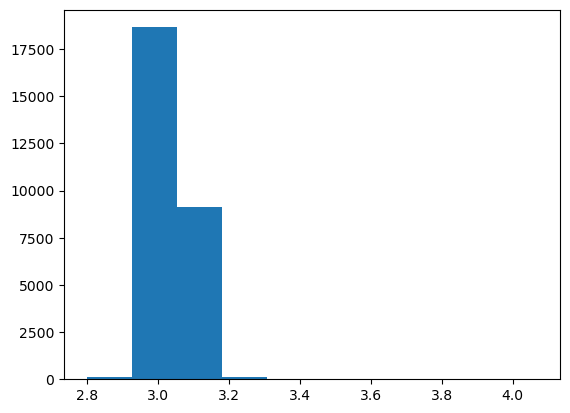

In [73]:
plt.hist(dataDF['scale_pv'])

In [21]:
## 설정값 날려주기
dataDF.drop(columns=['time','E_scr_sv','c_temp_sv','k_rpm_sv','n_temp_sv','s_temp_sv'],inplace=True)

In [22]:
dataDF = dataDF[(dataDF['scale_pv']<=3.10) & (dataDF['scale_pv']>=2.90)]

In [23]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26954 entries, 0 to 143090
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   E_scr_pv   26954 non-null  int64  
 1   c_temp_pv  26954 non-null  float64
 2   k_rpm_pv   26954 non-null  int64  
 3   n_temp_pv  26954 non-null  float64
 4   scale_pv   26954 non-null  float64
 5   s_temp_pv  26954 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


### 데이터 0인 값 nan로 바꿔서 삭제해주기

In [24]:
dataDF.replace(0,np.nan,inplace=True)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_13664\1374330893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF.replace(0,np.nan,inplace=True)


In [25]:
dataDF.dropna(inplace=True)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_13664\699702575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF.dropna(inplace=True)


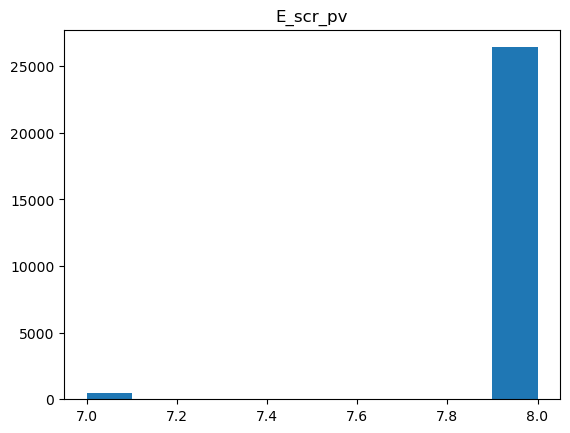

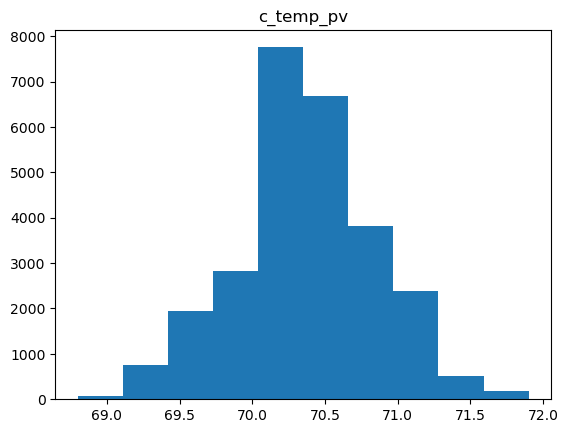

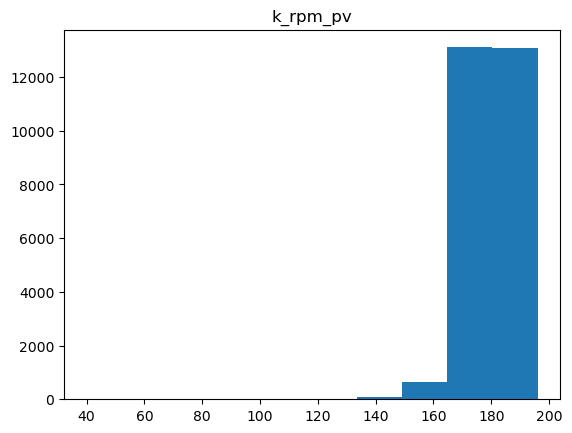

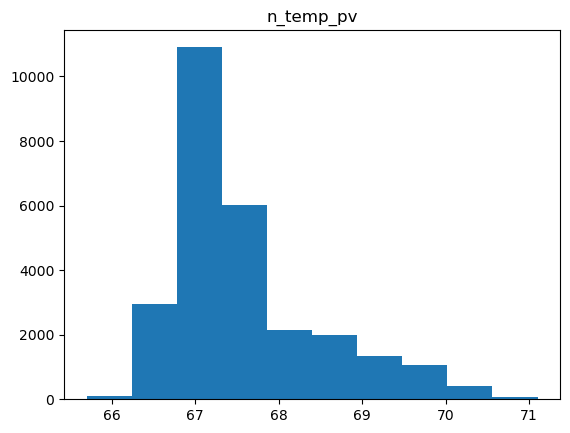

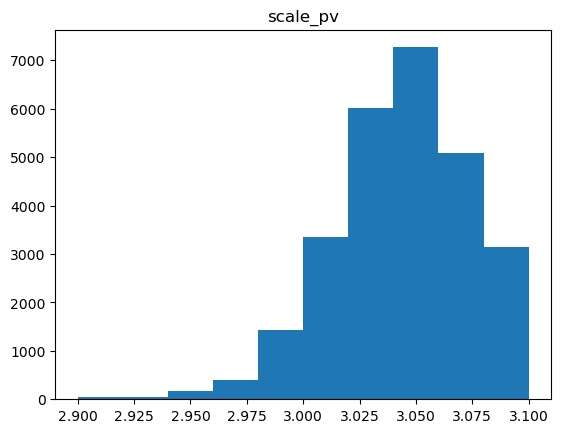

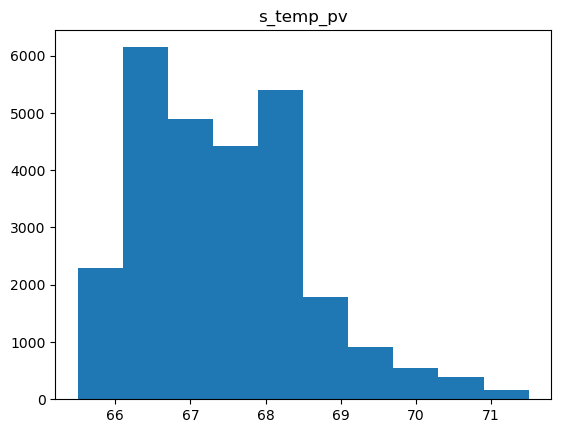

In [26]:
# 각 컬럼별 histogram 그려보기
for i in dataDF.columns:
    plt.figure()
    plt.hist(dataDF[i])
    plt.title(i)

# E_scr_pv 값이 영향없다고 판단해 컬럼 삭제

In [27]:
dataDF.drop(columns='E_scr_pv',inplace=True)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_13664\1899991200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF.drop(columns='E_scr_pv',inplace=True)


In [28]:
dataDF = dataDF[dataDF['k_rpm_pv']>40]

In [29]:
dataDF

,c_temp_pv,k_rpm_pv,n_temp_pv,scale_pv,s_temp_pv
0,69.6,189.0,67.2,3.01,67.1
1,69.8,189.0,67.2,3.01,67.0
2,69.7,189.0,67.9,3.08,65.9
3,69.7,189.0,67.8,3.08,65.9
4,69.7,189.0,67.8,3.08,65.9
...,...,...,...,...,...
143078,70.3,185.0,66.7,3.01,67.7
143081,70.4,185.0,66.8,3.03,67.3
143082,70.4,185.0,66.7,3.03,67.2
143086,70.4,185.0,66.7,3.06,66.9


In [30]:
dataDF.reset_index(inplace=True)

In [31]:
dataDF.drop(columns='index',inplace=True)

In [32]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26932 entries, 0 to 26931
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   c_temp_pv  26932 non-null  float64
 1   k_rpm_pv   26932 non-null  float64
 2   n_temp_pv  26932 non-null  float64
 3   scale_pv   26932 non-null  float64
 4   s_temp_pv  26932 non-null  float64
dtypes: float64(5)
memory usage: 1.0 MB


In [33]:
## 정제된 데이터 csv파일에 저장해놓기
dataDF.to_csv('clean_data.csv',index=False)

In [34]:
## 데이터 스케일링 하기
# 스케일러 종류 : StandardScaler, MinMaxScaler, RobustScaler